# AL Results Visualization

In this notebook, the goal is to visualize the results and compare the performance of the individual strategies with the respective model classes.

# Setup

In [1]:
# define the paths
import sys

basepath = "../"  # Project directory
sys.path.append(basepath)

# AL Scripts
AL_SCRIPTS_PATH = basepath + "al_lib/"

sys.path.append({AL_SCRIPTS_PATH})

from al_lib.active_learning_setting import ActiveLearningPaths

PATHS = ActiveLearningPaths()
(DATA_PATH, FIGURE_PATH, ENV_PATH, RESULTS_PATH, LOG_DIR) = PATHS
# sys.path.extend(PATHS)

sys.path

['/home/fhwn.ac.at/202375/.conda/envs/thesis/lib/python312.zip',
 '/home/fhwn.ac.at/202375/.conda/envs/thesis/lib/python3.12',
 '/home/fhwn.ac.at/202375/.conda/envs/thesis/lib/python3.12/lib-dynload',
 '',
 '/home/fhwn.ac.at/202375/.conda/envs/thesis/lib/python3.12/site-packages',
 '../',
 {'../al_lib/'},
 '../',
 '../04_Active_Learning/logs/',
 '../04_Active_Learning/results/',
 '../data/',
 '../04_Active_Learning/results/figures/',
 '/home/fhwn.ac.at/202375/.conda/envs/thesis/lib']

## Include a logger

In [2]:
# import the logging specifications from file 'logging_config.py'
from al_lib.logging_config import create_logger
import datetime

# Add data/time information
date = datetime.datetime.now().strftime("%Y-%m-%d")
# date = now.strftime("%Y-%m-%d")
log_file_name = f"{date}_vis_al.log"
log_file_path = f"{LOG_DIR}{log_file_name}"

# Create logger
logging = create_logger(__name__, log_file_path=log_file_path)
# Usage of the logger as follows:
logging.info("Logging started")
logging.info(f"log stored at: {log_file_path}")

2024-07-18 14:02:24 - INFO - Logging started
2024-07-18 14:02:24 - INFO - log stored at: ../04_Active_Learning/logs/2024-07-18_vis_al.log


# Imports
## Packages

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.kernel_ridge import KernelRidge as KRR
import pandas as pd

# Import results table

In [4]:
# define the path to the data
TABLES_PATH = RESULTS_PATH + "al_result_tables/"


def load_data(filename):
    data = pd.read_csv(TABLES_PATH + filename)
    return data

# Define the functions

In [5]:
def load_data(filename, TABLES_PATH):
    data = pd.read_csv(TABLES_PATH + filename)
    return data


def _seperate_results_test(results, model=None, model_name=None):

    test_rsme_random = pd.DataFrame()
    test_rsme_gsx = pd.DataFrame()
    test_rsme_gsy = pd.DataFrame()
    test_rmse_uncertainty = pd.DataFrame()
    if model_name == None:
        model_name = str(model).split(" ")[1]
    if model == None:
        model_name = model_name
    if (model_name is None) & (model is None):
        raise ValueError("Please provide the model or model_name")
    test_rsme_random = pd.concat(
        [
            test_rsme_random,
            results.filter(regex=f"rmse_test_{model_name}_random"),
        ],
        axis=1,
    )
    test_rsme_gsx = pd.concat(
        [
            test_rsme_gsx,
            results.filter(regex=f"rmse_test_{model_name}_gsx"),
        ],
        axis=1,
    )
    test_rsme_gsy = pd.concat(
        [
            test_rsme_gsy,
            results.filter(regex=f"rmse_test_{model_name}_gsy"),
        ],
        axis=1,
    )
    test_rmse_uncertainty = pd.concat(
        [
            test_rmse_uncertainty,
            results.filter(regex=f"rmse_test_{model_name}_uncertainty"),
        ],
        axis=1,
    )

    return test_rsme_random, test_rsme_gsx, test_rsme_gsy, test_rmse_uncertainty


def _seperate_results_val(results, model=None, model_name=None):

    val_rsme_random = pd.DataFrame()
    val_rsme_gsx = pd.DataFrame()
    val_rsme_gsy = pd.DataFrame()
    val_rmse_uncertainty = pd.DataFrame()
    if model_name == None:
        model_name = str(model).split(" ")[1]
    if model == None:
        model_name = model_name
    if (model_name is None) & (model is None):
        raise ValueError("Please provide the either model or model_name")
    val_rsme_random = pd.concat(
        [
            val_rsme_random,
            results.filter(regex=f"rmse_val_{model_name}_random"),
        ],
        axis=1,
    )
    val_rsme_gsx = pd.concat(
        [
            val_rsme_gsx,
            results.filter(regex=f"rmse_val_{model_name}_gsx"),
        ],
        axis=1,
    )
    val_rsme_gsy = pd.concat(
        [
            val_rsme_gsy,
            results.filter(regex=f"rmse_val_{model_name}_gsy"),
        ],
        axis=1,
    )
    val_rmse_uncertainty = pd.concat(
        [
            val_rmse_uncertainty,
            results.filter(regex=f"rmse_val_{model_name}_uncertainty"),
        ],
        axis=1,
    )

    return val_rsme_random, val_rsme_gsx, val_rsme_gsy, val_rmse_uncertainty


def _plot_rmse(
    test_rmse,
    selection_criteria,
    model_name=None,
    model=None,
    title=None,
    filepath=None,
):
    if model_name == None:
        model_name = str(model).split(" ")[1]
    if model == None:
        model_name = model_name
    if (model_name is None) & (model is None):
        raise ValueError("Please provide the model or model_name")
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    for i, rmse in enumerate(test_rmse):
        ax.plot(rmse.mean(axis=1), label=selection_criteria[i]["crit_name"])
        # calculate the standard deviation
        std = rmse.std(axis=1)
        ax.fill_between(
            range(len(rmse)),
            rmse.mean(axis=1) - std,
            rmse.mean(axis=1) + std,
            alpha=0.2,
        )
    if title == None:
        title = f"Test RMSE for {model_name}"
    else:
        title = title
    ax.set_title(title)
    ax.set_xlabel("Number of iterations of Active Learning")
    ax.set_ylabel("RMSE")
    ax.legend()
    if filepath != None:
        plt.savefig(filepath)
    plt.show()
    return fig, ax

In [6]:
from al_lib.results_vis import load_data  # , plot_results

In [7]:
# Import

TABLES_PATH = RESULTS_PATH + "al_result_tables/"
# load the data
filename_krr = "al_results_KernelRidge'>.csv"

data_krr = load_data(filename_krr, TABLES_PATH)

# rename the columns for better readability
for col in data_krr.columns:
    # rename the columns
    data_krr.rename(columns={col: col.replace("KernelRidge'>", "KRR")}, inplace=True)

data_krr.drop(columns=["Unnamed: 0"], inplace=True)
data_krr.head()

,rmse_test_KRR_random_0,rmse_val_KRR_random_0,sample_sel_KRR_random_0,rmse_full_KRR_random_0,selection_value_KRR_random_0,rmse_test_KRR_gsx_0,rmse_val_KRR_gsx_0,sample_sel_KRR_gsx_0,rmse_full_KRR_gsx_0,selection_value_KRR_gsx_0,...,rmse_test_KRR_uncertainty_9,rmse_val_KRR_uncertainty_9,sample_sel_KRR_uncertainty_9,rmse_full_KRR_uncertainty_9,selection_value_KRR_uncertainty_9,rmse_test_KRR_idw_9,rmse_val_KRR_idw_9,sample_sel_KRR_idw_9,rmse_full_KRR_idw_9,selection_value_KRR_idw_9
0,182.894679,187.746625,662.0,89.555435,NaN,185.008640,190.057853,770.0,89.555435,0.061172,...,173.481239,167.567486,769.0,86.119907,426.222923,173.135751,164.976172,1090.0,86.119907,86952.976155
1,182.726786,186.720215,767.0,89.555435,NaN,184.633329,189.073058,767.0,89.555435,0.055552,...,169.820985,164.431942,781.0,86.119907,220.577243,172.098242,163.929445,1265.0,86.119907,68406.216762
2,185.604885,188.317974,847.0,89.555435,NaN,184.143915,188.854502,787.0,89.555435,0.049992,...,170.333756,164.718201,1240.0,86.119907,218.354298,182.815407,183.741171,353.0,86.119907,81774.310336
3,173.408883,173.565253,430.0,89.555435,NaN,184.190365,188.239570,772.0,89.555435,0.047862,...,170.293199,164.683008,724.0,86.119907,217.160957,180.829369,178.393387,769.0,86.119907,87762.729056
4,171.842332,172.356494,329.0,89.555435,NaN,178.372307,172.079378,72.0,89.555435,0.046338,...,170.493497,164.915409,1090.0,86.119907,197.555622,188.238606,187.698658,423.0,86.119907,104211.800340


In [8]:
# Import
# load the data
filename_pls = "al_results_PLSRegression'>.csv"

data_pls = load_data(filename_pls, TABLES_PATH)

# rename the columns for better readability
for col in data_pls.columns:
    # rename the columns
    data_pls.rename(columns={col: col.replace("PLSRegression'>", "PLS")}, inplace=True)
    # data_pls.drop(columns=['Unnamed: 0'], inplace=True)
data_pls.drop(columns=["Unnamed: 0"], inplace=True)
# data_pls.drop(columns=['Unnamed: 0'], inplace=True)
data_pls.head()

,rmse_test_PLS_random_0,rmse_val_PLS_random_0,sample_sel_PLS_random_0,rmse_full_PLS_random_0,selection_value_PLS_random_0,rmse_test_PLS_gsx_0,rmse_val_PLS_gsx_0,sample_sel_PLS_gsx_0,rmse_full_PLS_gsx_0,selection_value_PLS_gsx_0,...,rmse_test_PLS_uncertainty_9,rmse_val_PLS_uncertainty_9,sample_sel_PLS_uncertainty_9,rmse_full_PLS_uncertainty_9,selection_value_PLS_uncertainty_9,rmse_test_PLS_idw_9,rmse_val_PLS_idw_9,sample_sel_PLS_idw_9,rmse_full_PLS_idw_9,selection_value_PLS_idw_9
0,140.050629,174.140332,105.0,101.01069,NaN,141.431484,175.790827,768.0,101.01069,0.078838,...,140.193442,146.883182,768.0,102.801786,832.233790,140.193442,146.883182,768.0,102.801786,158748.192795
1,142.038507,179.067581,22.0,101.01069,NaN,140.697473,176.187709,771.0,101.01069,0.075106,...,141.223939,164.302764,338.0,102.801786,145.479505,141.223939,164.302764,338.0,102.801786,141387.400168
2,137.498160,165.220770,583.0,101.01069,NaN,142.598259,176.118317,770.0,101.01069,0.064303,...,140.950592,161.220553,1145.0,102.801786,136.670348,140.950592,161.220553,1145.0,102.801786,123956.058708
3,135.116219,164.962887,644.0,101.01069,NaN,148.531165,177.175892,772.0,101.01069,0.049652,...,137.119378,152.620130,880.0,102.801786,150.086289,137.119378,152.620130,880.0,102.801786,121895.033184
4,134.506621,165.162948,555.0,101.01069,NaN,148.478987,171.850905,1121.0,101.01069,0.045075,...,137.270165,153.464751,1191.0,102.801786,161.771345,138.917860,150.174940,750.0,102.801786,91788.623140


In [9]:
# Import
# load the data
filename_rf = "al_results_RandomForestRegressor'>.csv"

data_rf = load_data(filename_rf, TABLES_PATH)

# rename the columns for better readability
for col in data_rf.columns:
    # rename the columns
    data_rf.rename(
        columns={col: col.replace("RandomForestRegressor'>", "RF")}, inplace=True
    )

data_rf.drop(columns=["Unnamed: 0"], inplace=True)
data_rf.head()

,rmse_test_RF_random_0,rmse_val_RF_random_0,sample_sel_RF_random_0,rmse_full_RF_random_0,selection_value_RF_random_0,rmse_test_RF_gsx_0,rmse_val_RF_gsx_0,sample_sel_RF_gsx_0,rmse_full_RF_gsx_0,selection_value_RF_gsx_0,...,rmse_test_RF_uncertainty_9,rmse_val_RF_uncertainty_9,sample_sel_RF_uncertainty_9,rmse_full_RF_uncertainty_9,selection_value_RF_uncertainty_9,rmse_test_RF_idw_9,rmse_val_RF_idw_9,sample_sel_RF_idw_9,rmse_full_RF_idw_9,selection_value_RF_idw_9
0,140.359343,154.172496,1153.0,101.693696,NaN,146.591331,160.677125,771.0,99.814205,0.076621,...,164.482735,164.854646,240.0,103.988654,82.123524,163.834543,165.675812,362.0,105.849281,54661.201006
1,147.505682,153.777703,93.0,101.693696,NaN,145.065415,159.090228,787.0,99.814205,0.052425,...,165.185255,167.052750,977.0,103.988654,76.096887,165.583092,169.969799,432.0,105.849281,59075.979949
2,143.886442,156.113915,181.0,101.693696,NaN,139.586092,159.768270,789.0,99.814205,0.043088,...,159.285906,165.217542,88.0,103.988654,66.862262,162.601296,167.748546,1034.0,105.849281,96292.223190
3,139.566944,156.265143,445.0,101.693696,NaN,140.087950,152.278062,696.0,99.814205,0.041979,...,165.963595,168.571673,926.0,103.988654,88.296955,172.423435,175.505810,30.0,105.849281,74304.181902
4,138.094482,158.871927,995.0,101.693696,NaN,142.207174,160.443704,774.0,99.814205,0.041637,...,163.569888,167.040713,421.0,103.988654,90.417225,171.012794,173.243815,1101.0,105.849281,62085.137882


In [10]:
# Import
# load the data
filename_hgb = "al_results_HistGradientBoostingRegressor'>.csv"

data_hgb = load_data(filename_hgb, TABLES_PATH)

# rename the columns for better readability
for col in data_hgb.columns:
    # rename the columns
    data_hgb.rename(
        columns={col: col.replace("HistGradientBoostingRegressor'>", "HGB")},
        inplace=True,
    )
data_hgb.drop(columns=["Unnamed: 0"], inplace=True)

data_hgb.head()

,rmse_test_HGB_random_0,rmse_val_HGB_random_0,sample_sel_HGB_random_0,rmse_full_HGB_random_0,selection_value_HGB_random_0,rmse_test_HGB_gsx_0,rmse_val_HGB_gsx_0,sample_sel_HGB_gsx_0,rmse_full_HGB_gsx_0,selection_value_HGB_gsx_0,...,rmse_test_HGB_uncertainty_9,rmse_val_HGB_uncertainty_9,sample_sel_HGB_uncertainty_9,rmse_full_HGB_uncertainty_9,selection_value_HGB_uncertainty_9,rmse_test_HGB_idw_9,rmse_val_HGB_idw_9,sample_sel_HGB_idw_9,rmse_full_HGB_idw_9,selection_value_HGB_idw_9
0,157.225616,167.985011,727.0,92.819675,NaN,160.563002,172.538839,771.0,92.819675,0.076051,...,143.911935,155.617564,636.0,90.523154,170.166399,143.911935,155.617564,636.0,90.523154,260.613843
1,175.357819,168.482291,757.0,92.819675,NaN,160.968381,170.421028,769.0,92.819675,0.067168,...,144.745335,159.877984,40.0,90.523154,165.810615,144.042159,158.213953,971.0,90.523154,891.598789
2,177.290685,172.672108,50.0,92.819675,NaN,160.389697,170.030888,770.0,92.819675,0.065345,...,148.739651,162.563873,53.0,90.523154,246.722403,137.865727,156.457641,247.0,90.523154,12.677911
3,174.103905,171.836049,725.0,92.819675,NaN,159.678224,166.574809,767.0,92.819675,0.059934,...,144.180808,155.640903,400.0,90.523154,156.390238,141.958105,158.764927,974.0,90.523154,83.525258
4,175.166086,174.067043,891.0,92.819675,NaN,161.098386,169.061036,789.0,92.819675,0.045269,...,136.695868,148.843144,390.0,90.523154,141.834457,138.926951,157.628439,356.0,90.523154,3.956779


In [11]:
# Import
# load the data
filename_xgb = "al_results_XGBRegressor'>.csv"

data_xgb = load_data(filename_xgb, TABLES_PATH)

# rename the columns for better readability
for col in data_xgb.columns:
    # rename the columns
    data_xgb.rename(columns={col: col.replace("XGBRegressor'>", "XGB")}, inplace=True)

data_xgb.drop(columns=["Unnamed: 0"], inplace=True)
data_xgb.head()

,rmse_test_XGB_random_0,rmse_val_XGB_random_0,sample_sel_XGB_random_0,rmse_full_XGB_random_0,selection_value_XGB_random_0,rmse_test_XGB_gsx_0,rmse_val_XGB_gsx_0,sample_sel_XGB_gsx_0,rmse_full_XGB_gsx_0,selection_value_XGB_gsx_0,...,rmse_test_XGB_uncertainty_9,rmse_val_XGB_uncertainty_9,sample_sel_XGB_uncertainty_9,rmse_full_XGB_uncertainty_9,selection_value_XGB_uncertainty_9,rmse_test_XGB_idw_9,rmse_val_XGB_idw_9,sample_sel_XGB_idw_9,rmse_full_XGB_idw_9,selection_value_XGB_idw_9
0,150.589568,147.931821,1190.0,99.325904,NaN,150.486006,147.822203,768.0,99.325904,0.080175,...,142.082672,146.834217,39.0,85.424894,169.006548,125.077317,115.700694,285.0,85.424894,1533.480360
1,147.221114,145.541399,212.0,99.325904,NaN,149.441945,147.598380,769.0,99.325904,0.067267,...,147.564670,150.673262,26.0,85.424894,142.518356,132.516504,124.288555,357.0,85.424894,1669.741633
2,153.126090,150.546898,318.0,99.325904,NaN,146.346654,145.660249,770.0,99.325904,0.065374,...,147.997556,151.755604,855.0,85.424894,175.479441,129.435747,128.580161,321.0,85.424894,2680.207267
3,149.195033,146.890536,572.0,99.325904,NaN,148.485747,149.207451,767.0,99.325904,0.059780,...,140.453656,139.024101,753.0,85.424894,138.807599,135.892344,121.839820,297.0,85.424894,1734.222560
4,151.829045,150.266083,322.0,99.325904,NaN,146.406004,148.126764,787.0,99.325904,0.054563,...,137.181409,138.572903,1065.0,85.424894,192.245260,136.960264,124.234971,262.0,85.424894,1683.198599


In [12]:
from al_lib.selection_criteria import (
    _random_selection,
    _gsx_selection,
    _gsy_selection,
    _uncertainty_selection,
)

selection_criteria = [
    {
        "criteria": _random_selection,
        "crit_name": "random",
        "kwargs": {},
    },  #'random_state': random_state}},
    {"criteria": _gsx_selection, "crit_name": "gsx", "kwargs": {}},
    {"criteria": _gsy_selection, "crit_name": "gsy", "kwargs": {}},
    {
        "criteria": _uncertainty_selection,
        "crit_name": "uncertainty",
        "kwargs": {"n_fold": 3},
    },
]

In [13]:
# Import the sklearn models
from sklearn.kernel_ridge import KernelRidge as KRR
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_decomposition import PLSRegression
from xgboost import XGBRegressor as XGB
from sklearn.ensemble import HistGradientBoostingRegressor as HGB

models = [KRR, RandomForestRegressor, PLSRegression, XGB, HGB]

# extract test rmse

In [14]:
from al_lib.results_vis import _seperate_results_test
from al_lib.results_vis import _seperate_results_val

# from al_lib.results_vis import _plot_rmse # old function

model_krr = models[0]  # results for krr
test_rsme_random, test_rsme_gsx, test_rsme_gsy, test_rmse_uncertainty, test_rmse_idw = (
    _seperate_results_test(data_krr, model_name="KRR")
)

In [15]:
test_rmse = (test_rsme_random, test_rsme_gsx, test_rsme_gsy, test_rmse_uncertainty, test_rmse_idw)

# _plot_rmse(test_rmse, model_name = "KRR")

# extract Validation RMSE

IndexError: list index out of range

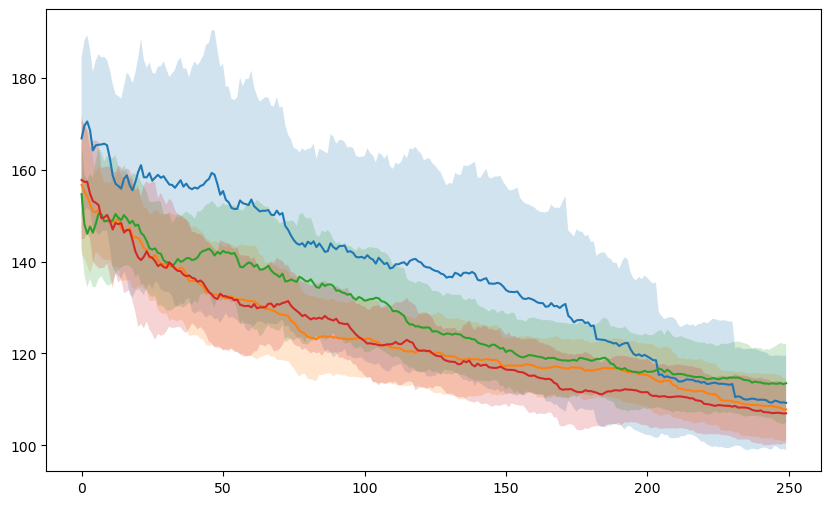

In [16]:
model_name = "KRR"
filepath = FIGURE_PATH + "val_rmse_krr.png"
sep_res_val = _seperate_results_val(data_krr, model_name=model_name)
plot = _plot_rmse(
    sep_res_val,
    selection_criteria=selection_criteria,
    model_name=model_name,
    title=f"Validation RMSE for {model_name}",
)

## Calc Mean Area Under the Curve

In [ ]:
# the are under the curve is the area between the curve and the x-axis
# here we calculate the area under the curve for both the validation and test RMSE
# the mean(rmse) can be calculated as the mean(rmse) for each learning step and selection criteria
# the mean area can be calculated as the sum of the mean(rmse)

# for each iteration step
for sel_crit, rmse in enumerate(test_rmse):
    # calculate the mean rmse
    rmse_mean_per_iteration = rmse.mean(axis=1)  # axis = 1 -> row wise
    # calculate the area under the curve
    auc = sum(rmse_mean_per_iteration).__round__(0)
    print(
        f"The area under the curve for {selection_criteria[sel_crit]['crit_name']} is {auc}"
    )

    # for each selection criteria

In [ ]:
for i, rmse in enumerate(test_rmse):
    aucs = []
    # calculate the AUC for each selection criteria by taking the mean of the RMSE for learning step
    for rmse in test_rmse:
        aucs.append(np.mean(rmse.mean(axis=1)))
    print(
        f"Model: {model_name}, Selection Criteria: {selection_criteria[i]['crit_name']}, AUC: {aucs[i]}"
    )

In [ ]:
for i, rmse in enumerate(test_rmse):
    rmse_mean_per_iteration = rmse.mean(axis=1)  # axis = 1 -> row wise

    # calc the std for each iteration
    std_rmse_mean_per_iteration = rmse.std(axis=1).round(3)

    # calculate the area under the curve
    auc = sum(rmse_mean_per_iteration).__round__(1)

    # calculate the mean of the AUC
    auc_mean = np.mean(rmse_mean_per_iteration).__round__(1)

    # calculate the standard deviation of the AUC
    auc_std = rmse_mean_per_iteration.std().__round__(1)

    # plot the development of the RMSE over the learning steps
    plt.plot(rmse_mean_per_iteration)
    plt.fill_between(
        range(len(rmse_mean_per_iteration)),
        rmse_mean_per_iteration - std_rmse_mean_per_iteration,
        rmse_mean_per_iteration + std_rmse_mean_per_iteration,
        alpha=0.2,
    )
    plt.title(f"RMSE for {selection_criteria[i]['crit_name']} (AUC: {auc})")
    plt.xlabel("Number of iterations of Active Learning")
    plt.ylabel("RMSE")
    plt.show()

# calculate the mean Area under the Curve for each sampling strategy and return the results

# old

def _calculate_auc(test_rmse):
    aucs = []
    for i, rmse in enumerate(test_rmse): #for each selection criteria
        rmse_mean_per_iteration = rmse.mean(axis=1) #axis = 1 -> row wise
        # calculate the area under the curve
        auc = sum(rmse_mean_per_iteration).__round__(1)
        auc_std = rmse.mean(axis=1).std().round(3)

        print(f"AUC for {selection_criteria[i]['crit_name']} is: {auc} (STD: {auc_std})")
        globals()[f"{selection_criteria[i]['crit_name']}_auc"] = auc
        globals()[f"{selection_criteria[i]['crit_name']}_auc_std"] = auc_std
        aucs.append((auc, auc_std))
    return aucs

aucs = _calculate_auc(test_rmse)

In [ ]:
std_rmse_mean_per_iteration

In [ ]:
def _calculate_auc(results):  # test_rmse
    """
    Calculate the Area under the curve for each selection criteria from the
    post-processed results
    Parameters:
    results: list of dataframes
    Returns:
    aucs: list of tuples (AUC, std_rmse_mean_per_iteration, AUC_mean, auc_std)
        each tuple contains the AUC, the standard deviation of the AUC, the mean of the AUC and the standard deviation of the RMSE
        AUC: float, the area under the curve
        std_rmse_mean_per_iteration: float, the standard deviation of the RMSE for each iteration
        AUC_mean: float, the mean of the AUC
        auc_std: float, the standard deviation of the AUC
    """
    aucs = []
    for i, rmse in enumerate(results):  # for each selection criteria

        rmse_mean_per_iteration = rmse.mean(axis=1)  # axis = 1 -> row wise

        # calc the std for each iteration
        std_rmse_mean_per_iteration = rmse.std(axis=1).round(3)

        # calculate the area under the curve
        auc = sum(rmse_mean_per_iteration).__round__(1)

        # calculate the mean of the AUC
        auc_mean = np.mean(rmse_mean_per_iteration).__round__(1)

        # calculate the standard deviation of the RMSE for each iteration
        auc_std = rmse_mean_per_iteration.std().__round__(1)
        aucs.append((auc, std_rmse_mean_per_iteration, auc_mean, auc_std))
    return aucs

In [ ]:
def _plot_auc(aucs, model_name, filepath, title=None):
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    for i, auc in enumerate(aucs):
        ax.bar(
            selection_criteria[i]["crit_name"],
            auc[2],
            yerr=auc[3],
            label=selection_criteria[i]["crit_name"],
            capsize=5,
        )
    if title == None:
        title = f"AUC/iteration for {model_name}"
    else:
        title = title
    ax.set_title(title)
    ax.set_ylabel("AUC")
    if filepath != None:
        plt.savefig(filepath)
    plt.show()
    return fig, ax

In [ ]:
# test revised _plot_auc function
aucs = _calculate_auc(test_rmse)
_plot_auc(aucs, model_name="KRR", filepath=FIGURE_PATH + "auc_krr.png")

# plot the aucs with the standard deviation
def _plot_auc(aucs, model_name, filepath, title = None):
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    for i, auc in enumerate(aucs):
        ax.bar(selection_criteria[i]['crit_name'], auc[0], yerr=auc[1], label=selection_criteria[i]['crit_name'], capsize = 5)
    if title == None:
        title = f"AUC for {model_name}"
    else:
        title = title
    ax.set_title(title)
    ax.set_ylabel("AUC")
    if filepath != None:
        plt.savefig(filepath)
    plt.show()

filepath = FIGURE_PATH + "auc_KRR.png"
_plot_auc(aucs, model_name = "KRR", filepath = filepath)

In [ ]:
# generate a combined plot for the AUCs
import matplotlib.patches as mpatches


def combined_auc_plot(mean_auc_test, mean_auc_val, model_name, filepath=None):
    """Generate a barplot of the mean AUC for the test and validation set for each selection criteria
    ----------
    Parameters:
    mean_auc_test: list of tuples, the mean AUC for the test set for each selection criteria
    mean_auc_val: list of tuples, the mean AUC for the validation set for each selection criteria
    model_name: str, the name of the model
    filepath: str, the path to save the plot
    ----------
    Returns:
    fig, ax: the figure and axis of the plot"""
    # select two nice colors
    colour_selection = ["#9ecae1", "#3182bd"]
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    index = np.arange(len(selection_criteria))
    barwidth = 0.35
    # plot the test aucs
    # correct code
    for i, (_, _, auc_mean, auc_err) in enumerate(mean_auc_test):
        ax.bar(
            index[i] - barwidth / 2,
            auc_mean,
            yerr=auc_err,
            label=f"{selection_criteria[i]['crit_name']} test",
            align="center",
            width=barwidth,
            color=colour_selection[0],
            capsize=6,
        )
    for i, (_, _, auc_mean, auc_err) in enumerate(mean_auc_val):
        ax.bar(
            index[i] + barwidth / 2,
            auc_mean,
            yerr=auc_err,
            label=f"{selection_criteria[i]['crit_name']} val",
            align="center",
            width=barwidth,
            color=colour_selection[1],
            capsize=6,
        )
    title = f"AUC of Active Learning Process for {model_name} \nCotrison of Selection Criteria for Test and Validation Set"

    # incorrect code
    # for i, auc in enumerate(aucs_test):
    #     ax.bar(selection_criteria[i]['crit_name'], auc[0], yerr=auc[1], label=f"{selection_criteria[i]['crit_name']} test", align='center', width=barwidth )
    # for i, auc in enumerate(auc_val):
    #     ax.bar(selection_criteria[i]['crit_name'], auc[0], yerr=auc[1], label=f"{selection_criteria[i]['crit_name']} val", align='center',width=barwidth)
    # title = f"AUC for {model_name}"
    ax.set_title(title)
    ax.set_ylabel("AUC")
    fig.legend = ax.legend()
    # x_labels = [
    #     selection_criteria[i]["crit_name"] for i in range(len(selection_criteria))
    # ]
    x_labels = ["Random", "GS_X", "GS_Y", "Uncertainty"]
    fig.xticks = ax.set_xticks(
        [i + 0.001 * barwidth for i in index], x_labels, # rotation=45
    )
    # fix the legend
    c0_patch = mpatches.Patch(color=colour_selection[0], label="Test")
    c1_patch = mpatches.Patch(color=colour_selection[1], label="Validation")

    ax.legend(
        handles=[c0_patch, c1_patch],
    )
    if filepath != None:
        plt.savefig(filepath + f"combined_auc_{model_name}.png")
    plt.show()
    return fig, ax


def test_combined_auc_plot():
    mean_auc_test = _calculate_auc(test_rmse)
    mean_auc_val = _calculate_auc(sep_res_val)
    combined_auc_plot(mean_auc_test, mean_auc_val, model_name="KRR")


test_combined_auc_plot()

# final report function

In [ ]:
# perform the analysis and plotting in an automated way
def report_al_results(results, model_name, filepath , selection_criteria):
    test_rmse = _seperate_results_test(results=results, model_name=model_name)
    val_rmse = _seperate_results_val(results = results, model_name=model_name)
    # generate the test rmse plot
    _plot_rmse(
        test_rmse,
        selection_criteria=selection_criteria,
        model_name=model_name,
        title=f"Test RMSE for {model_name}",
        filepath=filepath + f"test_rmse_{model_name}.png",
    )
    # generate the validation rmse plot
    _plot_rmse(
        val_rmse,
        selection_criteria=selection_criteria,
        model_name=model_name,
        title=f"Validation RMSE for {model_name}",
        filepath=filepath + f"val_rmse_{model_name}.png",
    )
    # calculate the auc for both rmse
    # aucs_test = _calculate_auc(test_rmse)
    # aucs_val = _calculate_auc(val_rmse)

    # generate the auc plot
    # (auc, std_rmse_mean_per_iteration, auc_mean, auc_std) = _calculate_auc(results)
    # _plot_auc(auc_mean, model_name = model_name, filepath = filepath + f"auc_{model_name}.png")

    # revised
    mean_auc_test = _calculate_auc(test_rmse)
    mean_auc_val = _calculate_auc(val_rmse)
    combined_auc_plot(
        mean_auc_test = mean_auc_test, mean_auc_val = mean_auc_val, model_name=model_name, filepath=filepath
    )

## KRR

In [ ]:
filepath = FIGURE_PATH + "results_visualization/"
report_al_results(
    data_krr, model_name="KRR", filepath=filepath, selection_criteria=selection_criteria
)

## PLS

In [ ]:
filepath = FIGURE_PATH + "results_visualization/"
report_al_results(
    data_pls, model_name="PLS", filepath=filepath, selection_criteria=selection_criteria
)

## RF

In [ ]:
filepath = FIGURE_PATH + "results_visualization/"
report_al_results(data_rf, model_name="RF", filepath=filepath, selection_criteria=selection_criteria
)

## XGB

In [ ]:
filepath = FIGURE_PATH + "results_visualization/"
report_al_results(data_xgb, model_name="XGB", filepath=filepath, selection_criteria=selection_criteria)

In [ ]:
# generate only the validation RMSE plot for XGB

model_name = "XGB"
filepath = FIGURE_PATH + "results_visualization/"
sep_res_val = _seperate_results_val(data_xgb, model_name=model_name)
_plot_rmse(
    sep_res_val,
    selection_criteria=selection_criteria,
    model_name=model_name,
    title=f"Validation RMSE for {model_name}",
)

In [ ]:
# Investigate the validation results for rf

df_val_rf = _seperate_results_val(data_rf, model_name="RF")
df_val_pls = _seperate_results_val(data_pls, model_name="PLS")
plot_rf = _plot_rmse(
    df_val_rf,
    selection_criteria=selection_criteria,
    model_name="RF",
    title="Validation RMSE for RF",
    filepath=FIGURE_PATH + "val_rmse_rf.png",
)
plot_pls = _plot_rmse(
    df_val_pls,
    selection_criteria=selection_criteria,
    model_name="PLS",
    title="Validation RMSE for PLS",
    filepath=FIGURE_PATH + "val_rmse_pls.png",
)

In [ ]:
# calculate the sum of each column in the dataframe

# filter the rmse_test columns
test_col = data_rf.filter(regex="rmse_test")
val_col = data_rf.filter(regex="rmse_val")
# calculate the sum of the rmse_test columns for uncertainty
test_col_uncertainty = test_col.filter(regex="uncertainty")
val_col_uncertainty = val_col.filter(regex="uncertainty")

# calculate the sum of the rmse_test columns for uncertainty
test_sum = test_col_uncertainty.sum(axis=0) 
val_sum = val_col_uncertainty.sum(axis=0)
# test_col_uncertainty.sum(axis=0), val_col_uncertainty.sum(axis=0)

mean_test_sum = test_sum.mean()
mean_val_sum = val_sum.mean()
std_test_sum = test_sum.std()
std_val_sum = val_sum.std()
median_test_sum = test_sum.median()
median_val_sum = val_sum.median()

# plot the mean and median of the respective columns
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(test_sum.index, test_sum, label="test")
ax.plot(val_sum.index, val_sum, label="val")
ax.axhline(mean_test_sum, color="r", linestyle="--", label="mean test")
ax.axhline(median_test_sum, color="b", linestyle="--", label="median test")

ax.axhline(mean_val_sum, color="g", linestyle="--", label="mean val")
ax.axhline(median_val_sum, color="y", linestyle="--", label="median val")

ax.fill_between(
    test_sum.index,
    mean_test_sum - std_test_sum,
    mean_test_sum + std_test_sum,
    alpha=0.2,
)
ax.fill_between(
    val_sum.index,
    mean_val_sum - std_val_sum,
    mean_val_sum + std_val_sum,
    alpha=0.2,
)

#ax.axhline(mean_val_sum, color="g", linestyle="--", label="mean val")
# ax.fill_between(
#     val_sum.index,
#     mean_val_sum - std_val_sum,
#     mean_val_sum + std_val_sum,
#     alpha=0.2,
# )
ax.set_title("Sum of test RMSE for Random Forest")
ax.set_ylabel("Sum of RMSE")
ax.legend()

#rotate the label of the x-axis
plt.xticks(rotation=45)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 4, figsize=(10, 6), sharey=True)

fig.suptitle("Results for the Random Forest Model \nSum of RMSE for selection criteria", fontsize=16)

for i, crit_name in enumerate(["uncertainty", "random", "gsx", "gsy"], start=0):
    test_sum = test_col.filter(regex=crit_name).sum(axis=0)
    val_sum = val_col.filter(regex=crit_name).sum(axis=0)

    # Align the indices of val_sum to match test_sum
    val_sum.index = test_sum.index
    
    # Calculate mean and median for both test and validation sums
    mean_test_sum = test_sum.mean()
    mean_val_sum = val_sum.mean()
    std_test_sum = test_sum.std()
    std_val_sum = val_sum.std()
    median_test_sum = test_sum.median()
    median_val_sum = val_sum.median()

    # Plot test data
    ax[i-1].plot(test_sum.index, test_sum, label="test", marker='o')
    # Plot validation data
    ax[i-1].plot(val_sum.index, val_sum, label="val", marker='o')
    
    # Overlay mean and median lines for both test and validation data
    # ax[i-1].axhline(mean_test_sum, color="r", linestyle="--", label="mean test")
    # ax[i-1].axhline(median_test_sum, color="b", linestyle="--", label="median test")
    # ax[i-1].axhline(mean_val_sum, color="g", linestyle="--", label="mean val")
    # ax[i-1].axhline(median_val_sum, color="y", linestyle="--", label="median val")
    
    # set a title for each subplot
    ax[i-1].set_title(f"{crit_name}")
    # Rotate the label of the x-axis
    ax[i-1].set_xticklabels(ax[i-1].get_xticks())
    # ax[i-1].set_ylabel("Sum of RMSE")
    # ax[i-1].set_xlabel("Number of iterations of Active Learning")

    
    # Add legend
    # ax[i-1].legend()
plt.ylabel("Sum of RMSE")
plt.xlabel("Iterations of Active Learning", loc = "center")
plt.legend()
plt.tight_layout()  # Adjust layout to make room for long axis labels
plt.savefig(FIGURE_PATH + "sum_rmse_rf_per_selection_crit.png")
plt.show()

In [ ]:
# subplot of the each run of the model for each selection criteria
    # each subplot should contain the test and validation RMSE for each selection criteria

# data
plot_data = data_rf

plot_data.head()

# filter the data for the test and validation RMSE
test_data = plot_data.filter(regex="rmse_test")
val_data = plot_data.filter(regex="rmse_val")

# filter the data for the test and validation RMSE for each selection criteria
for crit_name in ["uncertainty", "random", "gsx", "gsy"]:
    test_data_crit = test_data.filter(regex=crit_name)
    val_data_crit = val_data.filter(regex=crit_name)

    # plot the data
    fig, ax = plt.subplots(1, 2, figsize=(10, 6), sharey=True)
    fig.suptitle(f"Results for the Random Forest Model \nRMSE for selection criteria: {crit_name}", fontsize=16)
    for i, data in enumerate([test_data_crit, val_data_crit], start=0):
        for col in data.columns:
            ax[i].plot(data[col], label=col)
            ax[i].set_title(["Test", "Validation"][i])
            ax[i].set_ylabel("RMSE")
            ax[i].set_xlabel("Iterations of Active Learning")
            # set the y-axis to be the same for all subplots
            ax[i].set_ylim(110, 350)
            ax[i].legend(("Run 1", "Run 2", "Run 3","Run 4", "Run 5"))
    plt.show()
